<p><h1><span style="color:#2f4f4f"><u>Project Titanic Data Analysis</u></span></h1></p>

The findings in the report presented below are tentative.

## Introduction
This is my final project to conduct data analysis on the Titinic data provided on 891 passengers onboard the ship. 

## Questions Regarding This Dataset
1. What is the survival rate for each gender?
2. Does the class of travel determine the survival rate? 
3. Does age affect the survival rate?

In [627]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [628]:
# reads and put titanic_data.csv file into a dataframe.
titanic_df = pd.read_csv('titanic_data.csv')

# shows what are in the fields of titanic_data.csv
print (titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [629]:
# shows the number of missing 'age' values in the data
titanic_df[titanic_df['Age'].isnull()]['PassengerId'].count()

177

In [630]:
# shows the number of missing 'age' values by Pclass
print ("Pclass 1:")
print (titanic_df[(titanic_df['Age'].isnull()) & (titanic_df['Pclass']==1)]['Sex'].value_counts())
print ("")
print ("Pclass 2:")
print (titanic_df[(titanic_df['Age'].isnull()) & (titanic_df['Pclass']==2)]['Sex'].value_counts())
print ("")
print ("Pclass 3:")
print (titanic_df[(titanic_df['Age'].isnull()) & (titanic_df['Pclass']==3)]['Sex'].value_counts())

Pclass 1:
male      21
female     9
Name: Sex, dtype: int64

Pclass 2:
male      9
female    2
Name: Sex, dtype: int64

Pclass 3:
male      94
female    42
Name: Sex, dtype: int64


### Cleaning up missing values under 'Age' column
The missing values under the 'Age' column in this dataset was being replaced by the mean of the age in each class and sex. This is an <em><b>assumption</em></b> made for the lack of information. 

In [631]:
# using Pclass and Sex to find the median age for each Pclass and Sex
print ("Age median values by Age and Sex:")
print (titanic_df.groupby(['Sex','Pclass'], as_index=False).median().loc[:, ['Sex','Pclass', 'Age']])

# then, apply transformation to Age missing values with regard to Pclass and Sex
titanic_df.loc[:, 'Age'] = titanic_df.groupby(['Sex','Pclass']).transform(lambda x: x.fillna(x.median()))

Age median values by Age and Sex:
      Sex  Pclass   Age
0  female       1  35.0
1  female       2  28.0
2  female       3  21.5
3    male       1  40.0
4    male       2  30.0
5    male       3  25.0


### Question 1: What is the survival rate for each gender?

Total on Board:
male      577
female    314
Name: Sex, dtype: int64

Total Survived:
female    233
male      109
Name: Sex, dtype: int64


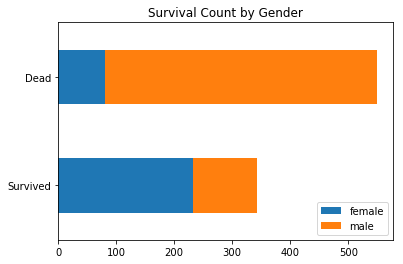

In [632]:
total_counts = titanic_df['Sex'].value_counts()
survived = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(title="Survival Count by Gender", kind='barh',stacked=True)

print ("Total on Board:")
print (total_counts)
print ("")
print ("Total Survived:")
print (survived)

In [633]:
survival_rates_by_gender = survived / total_counts

print ("Survival Rates:")
print (survival_rates_by_gender)

Survival Rates:
female    0.742038
male      0.188908
Name: Sex, dtype: float64


#### Of the 577 males onboarded the ship, 109 males survived the shipwreck, a 19% survival rate. Of the 314 females onboarded the ship, 233 females survived the shipwreck, a 74% survival rate.

#### Purely by looking at the survival rates between genders, females are more likely to survive than males. This could be largely due to the evacuation protocal when the shipwreck happened. Women are likely given the first priority to evacuate before men.

### Question 2: Does the class of travel determine the survival rate?

In [634]:
# calculating the survived class and dead class
survived_class = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts()
dead_class = titanic_df[titanic_df['Survived'] == 0]['Pclass'].value_counts()

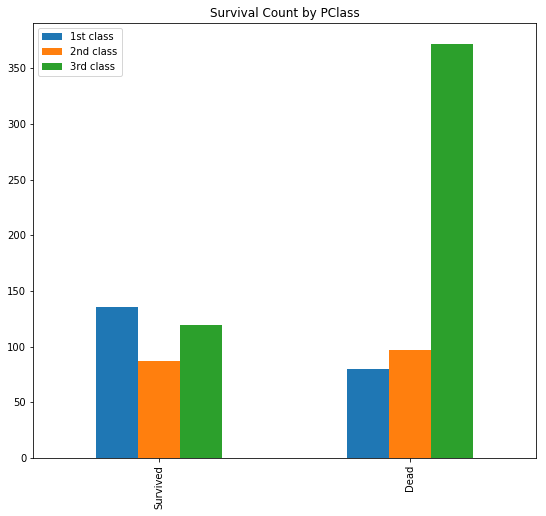

In [635]:
df = pd.DataFrame([survived_class, dead_class])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', title= 'Survival Count by PClass', figsize=(9, 8))
plt.legend(['1st class', '2nd class', '3rd class'], loc='upper left')

In [636]:
print (survived_class/(survived_class+dead_class))

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


#### The chart above shows a representation of survival counts between different classes and clearly shown that PClass 1 passengers have the highest survival count. 

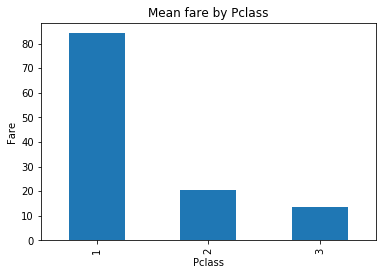

In [637]:
titanic_df.groupby(['Pclass'])['Fare'].mean().plot(kind='bar')
plt.ylabel('Fare')
plt.title('Mean fare by Pclass')

#### The above chart extracts the mean fare of each class. It's evident that class 1 passengers paid a distinctively higher fare and that seems to suggest higher fare meant higher chance in survival.

### Question 3: Does age affect the survival rate?
Earlier, the 177 missing 'Age' fields were filled in with the mean passenger's age of similar Pclass and Sex. <br>

<span style = "color:gray">
<b>Note:</b>
<br>
<em><b>177 passengers missing age: </b><br>
Pclass 1 = 21m, 9f <br>
Pclass 2 = 9m, 2f <br> 
Pclass 3 = 94m, 42f
<br><br>
<b>Mean age of passengers to be filled in: </b><br>
Female, PClass 1 = 35 years old<br>
Female, PClass 2 = 28 years old<br>
Female, PClass 3 = 21.5 years old<br>
Male, PClass 1 = 40 years old<br>
Male, PClass 2 = 30 years old<br>
Male, PClass 3 = 25 years old</em>
</span>
<br><br>
Below chart shows a comparison of "Default" age where the null fields were dropped from the statisics vs. the imputed age values where the mean age were pre-filled in based on the class and sex of the passenger. 

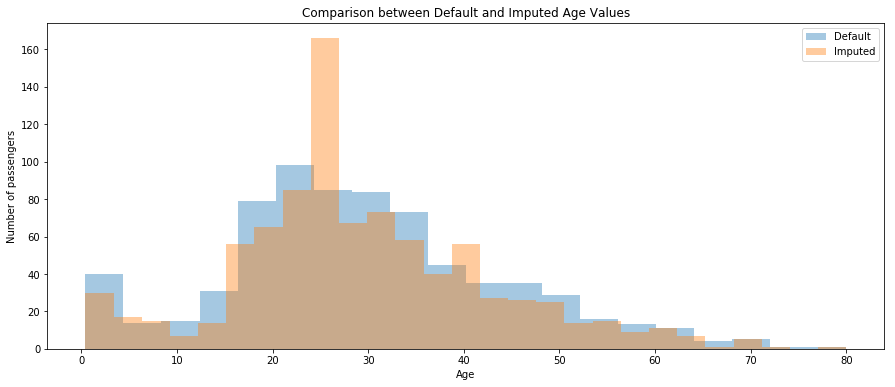

In [638]:
# take a look at the defaulted age vs. the one we filled using mean of Pclass and Sex
figure = plt.figure(figsize=(15,6))
titanic_df2 = pd.read_csv("titanic_data.csv")
sns.distplot(titanic_df2.Age.dropna(), kde = False, label = 'Default')
sns.distplot(titanic_df.Age, kde = False, label = 'Imputed')
plt.title('Comparison between Default and Imputed Age Values')
plt.ylabel('Number of passengers')
plt.legend()

#### Using this way to impute the age did affect the age distribution with tremedous peak at 25-yo and also 40-yo bars.

#### The results are skewed because 94 of the male passengers' age are being pre-filled with the mean age of 25 years old for Pclass 3 male passengers. Likewise, there seem to be an unusual spike under 40-yo bar. That is also due to the fact that 21 of the male passengers' age are pre-filled with mean age of 40 years old for Pclass 1 passengers.

In [639]:
survived = titanic_df[titanic_df['Survived']==1]['Age'].describe()
dead = titanic_df[titanic_df['Survived']==0]['Age'].describe()

print ("Survived Age:")
print (survived)
print ("")
print ("Dead Age:")
print (dead)

Survived Age:
count    342.000000
mean      28.108684
std       14.010565
min        0.420000
25%       21.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Dead Age:
count    549.000000
mean      29.737705
std       12.818264
min        1.000000
25%       22.000000
50%       25.000000
75%       37.000000
max       74.000000
Name: Age, dtype: float64


#### The mean survival age is at 28 years old, not hugely different from the mean fatality age at 30 years old. This could also meant that a large percentage of passengers falls within the adult age range of 14 - 40 years old. 

#### Exploring that further, we categorize the age of a child, adult and senior accordingly.

In [640]:
# Categorising by age, where a Child is betwen 0-13 yo, an Adult 14-40 yo and Senior 41-90 yo
titanic_df['Age_Cust'] = pd.cut(titanic_df['Age'], bins = [0,13,40,90] , labels=['Childs','Adults','Seniors'])

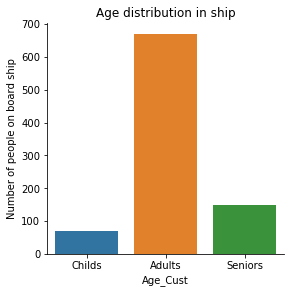

In [641]:
sns.factorplot('Age_Cust', data = titanic_df, kind='count')
plt.ylabel('Number of people on board ship')
plt.title('Age distribution in ship')

#### This is confirmed by looking at the age distribution, a huge percentage belongs to the adult group between age 14 to 40.

### Now we look at the survival rate across the ages

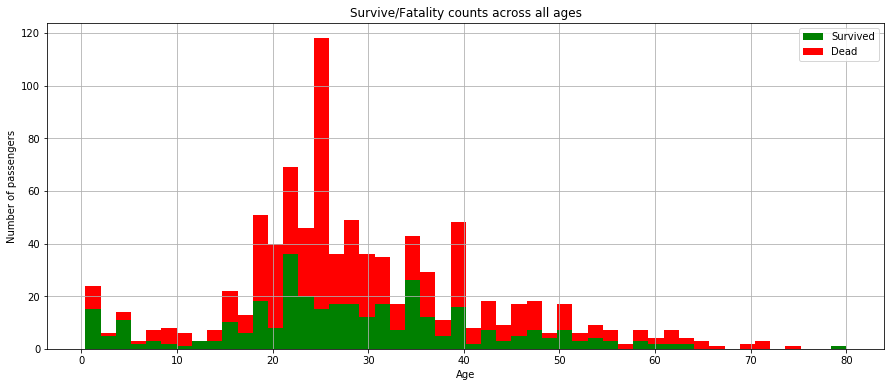

In [642]:
figure = plt.figure(figsize=(15,6))
plt.hist([titanic_df[titanic_df['Survived']==1]['Age'], titanic_df[titanic_df['Survived']==0]['Age']], stacked=True, bins =50, color = ['g','r'], label = ['Survived','Dead'])
plt.title('Survive/Fatality counts across all ages')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.legend()

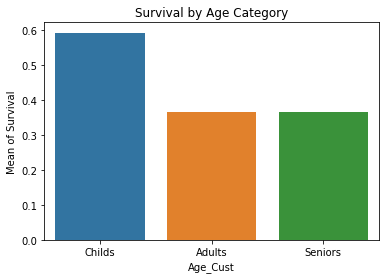

In [643]:
sns.barplot('Age_Cust', 'Survived', data = titanic_df, ci=None)
plt.title('Survival by Age Category')
plt.ylabel('Mean of Survival')

#### The first chart shows the survival and fatality counts across all ages. It is evident that more passengers under the age of 7 survived as compared to the older passengers. 

#### The second chart shows clearly that a child (0-13 yo) is much likely to survive than that of the adults or seniors. 

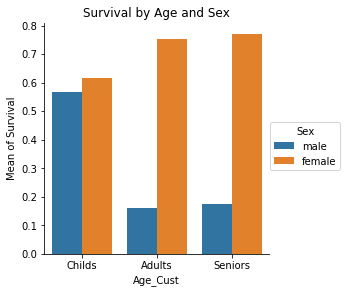

In [644]:
sns.factorplot('Age_Cust', 'Survived', data = titanic_df, hue='Sex', kind='bar', ci=None)
plt.title('Survival by Age and Sex')
plt.ylabel('Mean of Survival')

#### Comparing the survival by age and sex, it suggests that the children and women are given the priority to escape during the shipwreck.

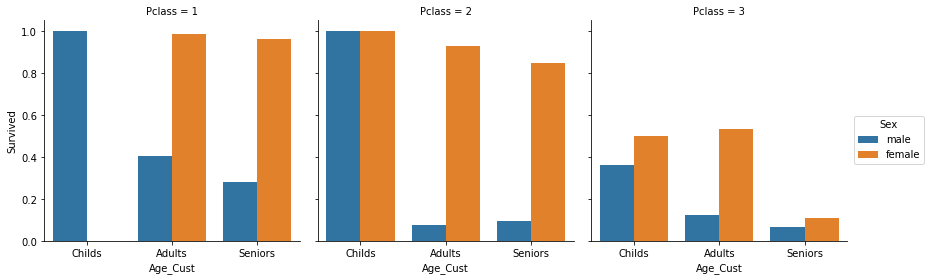

In [645]:
sns.factorplot('Age_Cust', 'Survived', data = titanic_df, hue='Sex', kind='bar', col='Pclass', ci=None)

#### And it seems evident that the ones who paid a higher fare do have a better chance at survival.

### Just Curious - Which are the 3 Biggest Families Onboard?
Assumption: The ones with the same last name are part of the same family.

In [646]:
def last_name(name):
    split_name = name.split(",")
    last_name = split_name[0]
    return last_name
    
family = titanic_df['Name'].apply(last_name)
print (family.value_counts().sort_values(ascending=False).head())

Andersson    9
Sage         7
Carter       6
Panula       6
Skoog        6
Name: Name, dtype: int64


#### The biggest 3 families on-board Titanic are the Andersson, Sage and Johnson.

### Going deeper into Andersson's Family...

In [647]:
titanic_df[(titanic_df['Name'].apply(last_name))=='Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cust
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Adults
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Adults
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Childs
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Adults
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Childs
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Childs
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Adults
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Childs
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Childs


#### Supposedly the assumption of all 9 under "Andersson" are from the same family, there are only 2 survivals - female age 17 and male age 27. Ironically, the fare paid by both of them are the lowest in the family and both hold a different ticket number.

### Comparing Survival with Gender, Age and Fare

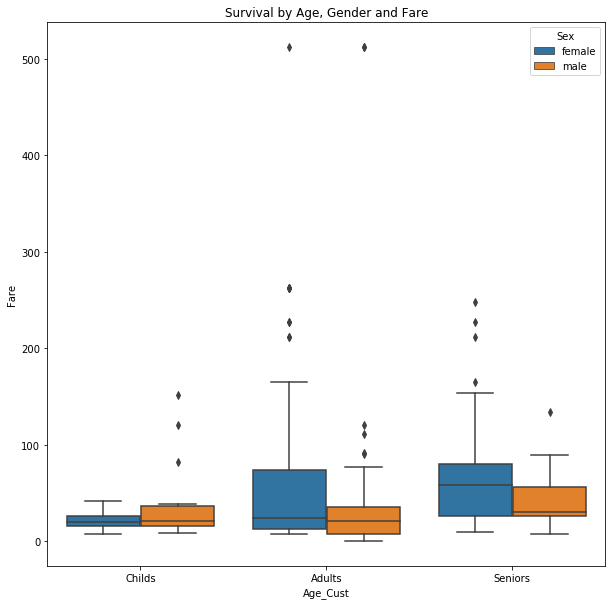

In [648]:
plt.figure(figsize=(10,10))
plt.title('Survival by Age, Gender and Fare')
survived_df = titanic_df[titanic_df['Survived'] == 1]
sns.boxplot(x="Age_Cust", y="Fare", hue="Sex", data=survived_df, dodge=True)

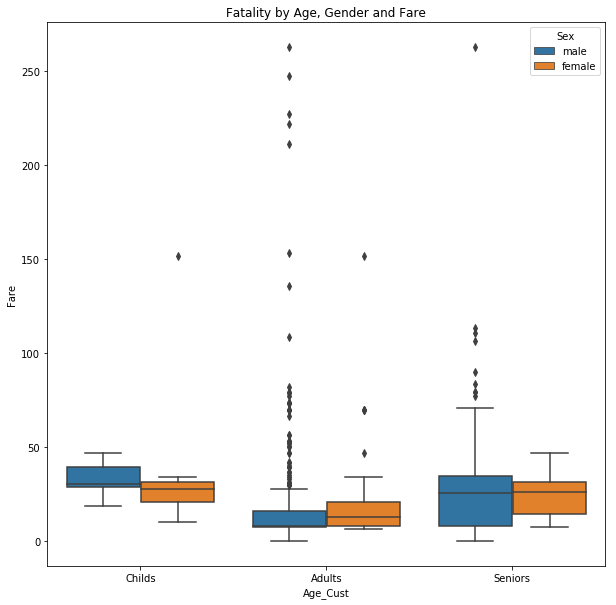

In [649]:
plt.figure(figsize=(10,10))
plt.title('Fatality by Age, Gender and Fare')
dead_df = titanic_df[titanic_df['Survived'] == 0]
sns.boxplot(x="Age_Cust", y="Fare", hue="Sex", data=dead_df, dodge=True)

#### From the 'survival box plot', the higher fares are paid by older males. The fares are not evenly distributed with distinct outliers paying more than 500 dollars... and that coincidentally display a chance of survival, as compared to other males who don't pay as much in the same age group.

## Conclusions

1. The age column includes several missing values, and using the median to fill in the gaps affected the age distribution, especially for those under age 25 and 40. 
2. The uneven distribution of higher males than females represented in this data might tilt the results when making comparisons of the gender with fare, age or survival rate. 
3. The statistics shows corelation but not causation. It suggests the strength of relationship between two variables but unable to tell me the true cause of their death nor survival. 
4. It would be interesting to include the education level of the adults in this chart, that would draw interesting corelations if the ones better educated would have a better chance at survival. 